In [116]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import tifffile
from scipy.spatial import distance_matrix
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 20

### Load data from NGN2 DIV25 experiment & process

In [117]:
data_dir = Path('/lab/processed-data/EXP_JSM002_NGN2_DIV25_wholeplate')
image_data = pd.read_csv(data_dir / 
                         '2022-12-12_tdp43_analysis'/
                         '2022-12-12_tdp43_analysisImage.csv')
soma_data = pd.read_csv(data_dir / 
                        '2022-12-12_tdp43_analysis'/
                        '2022-12-12_tdp43_analysiscytoplasm_outlines.csv')
nuclei_data = pd.read_csv(data_dir / 
                          '2022-12-12_tdp43_analysis'/
                          '2022-12-12_tdp43_analysisnuclei.csv')

In [118]:
measurement = 'Intensity_IntegratedIntensity_'
channels = ['TDP43_corrected', 'pTDP43_corrected']

ratio_data = pd.DataFrame(index = soma_data.index, 
                          columns = channels)
n_cells = soma_data.shape[0]
ratio_data['row'] = np.zeros(n_cells)
ratio_data['col'] = np.zeros(n_cells)
ratio_data['concentration'] = np.zeros(n_cells)
ratio_data['ImageNumber'] = soma_data['ImageNumber']

# Create ratio data
# for ch in channels:
    # ratio_data[ch] = ((soma_data[measurement + ch] - 
    #                    nuclei_data[measurement + ch]) / 
    #                   nuclei_data[measurement + ch])
    # ratio_data[ch].loc[ratio_data['ImageNumber'] == 1] = 1

# Add raw data columns to dataframe
ratio_data['TDP43_nucleus'] = nuclei_data[measurement + channels[0]] / nuclei_data['AreaShape_Area']
ratio_data['TDP43_cytoplasm'] = (soma_data[measurement + channels[0]] - 
                                 nuclei_data[measurement + channels[0]]) /  (soma_data['AreaShape_Area'] - nuclei_data['AreaShape_Area'])
ratio_data['pTDP43_nucleus'] = nuclei_data[measurement + 'p' + channels[0]]
ratio_data['pTDP43_cytoplasm'] = (soma_data[measurement + 'p' + channels[0]] - 
                                  nuclei_data[measurement + 'p' + channels[0]])
ratio_data['TDP43_ratio'] = (ratio_data['TDP43_cytoplasm'] / 
                             ratio_data['TDP43_nucleus'])


# Create lookup table for rows-concentrations
conc_lookup = {'B' : 4e-6,
               'C' : 2e-6,
               'D' : 1e-6,
               'E' : 500e-9,
               'F' : 250e-9,
               'G' : 125e-9}

# Assign each cell a row & column index, and concentration (condition)
for i_cell in np.arange(n_cells):
    ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][25]
    ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][26:28]
    ratio_data['concentration'].iloc[i_cell] = conc_lookup[ratio_data['row'].iloc[i_cell]]

# Remove first image, which is unlabeled
ratio_data = ratio_data.drop(index=1)
n_cells = ratio_data.shape[0]
ratio_data.index = np.arange(n_cells)

n_cells = ratio_data.shape[0]
ratio_data.index = np.arange(n_cells)

/tmp/ipykernel_4614/2158126310.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][25]
/tmp/ipykernel_4614/2158126310.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][26:28]
/tmp/ipykernel_4614/2158126310.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['concentration'].il

In [119]:
ratio_data

,TDP43_corrected,pTDP43_corrected,row,col,concentration,ImageNumber,TDP43_nucleus,TDP43_cytoplasm,pTDP43_nucleus,pTDP43_cytoplasm,TDP43_ratio
0,NaN,NaN,B,02,4.000000e-06,1,0.010926,0.009060,1.241634,1304.827906,0.829269
1,NaN,NaN,B,02,4.000000e-06,1,0.010811,0.008884,1.632287,1102.366938,0.821797
2,NaN,NaN,B,02,4.000000e-06,1,0.009902,0.008931,1.990810,21.067235,0.901981
3,NaN,NaN,B,02,4.000000e-06,1,0.014415,0.009656,1.589720,3.894484,0.669850
4,NaN,NaN,B,02,4.000000e-06,1,0.009960,0.009070,1.782650,6.354130,0.910666
...,...,...,...,...,...,...,...,...,...,...,...
2918,NaN,NaN,G,11,1.250000e-07,60,0.344312,0.327472,3.796834,5.010503,0.951090
2919,NaN,NaN,G,11,1.250000e-07,60,0.318056,0.410344,8.051679,15.938634,1.290162
2920,NaN,NaN,G,11,1.250000e-07,60,0.337831,0.384052,7.435591,8.390880,1.136818
2921,NaN,NaN,G,11,1.250000e-07,60,0.213131,0.310556,2.244502,2.286007,1.457118


In [120]:
data = ratio_data.copy()
data.loc[data['col'] == '02', 'row'] = 'E'
data = data.query('col==["02","06"]')
data

,TDP43_corrected,pTDP43_corrected,row,col,concentration,ImageNumber,TDP43_nucleus,TDP43_cytoplasm,pTDP43_nucleus,pTDP43_cytoplasm,TDP43_ratio
0,NaN,NaN,E,02,4.000000e-06,1,0.010926,0.009060,1.241634,1304.827906,0.829269
1,NaN,NaN,E,02,4.000000e-06,1,0.010811,0.008884,1.632287,1102.366938,0.821797
2,NaN,NaN,E,02,4.000000e-06,1,0.009902,0.008931,1.990810,21.067235,0.901981
3,NaN,NaN,E,02,4.000000e-06,1,0.014415,0.009656,1.589720,3.894484,0.669850
4,NaN,NaN,E,02,4.000000e-06,1,0.009960,0.009070,1.782650,6.354130,0.910666
...,...,...,...,...,...,...,...,...,...,...,...
2560,NaN,NaN,G,06,1.250000e-07,55,0.244333,0.247706,4.830138,4.369088,1.013806
2561,NaN,NaN,G,06,1.250000e-07,55,0.334557,0.270808,6.933880,9.496185,0.809453
2562,NaN,NaN,G,06,1.250000e-07,55,0.342806,0.313360,5.729338,8.217041,0.914103
2563,NaN,NaN,G,06,1.250000e-07,55,0.243442,0.270791,4.151209,2.431123,1.112344


Text(0.5, 0.98, 'DIV25 NGN2')

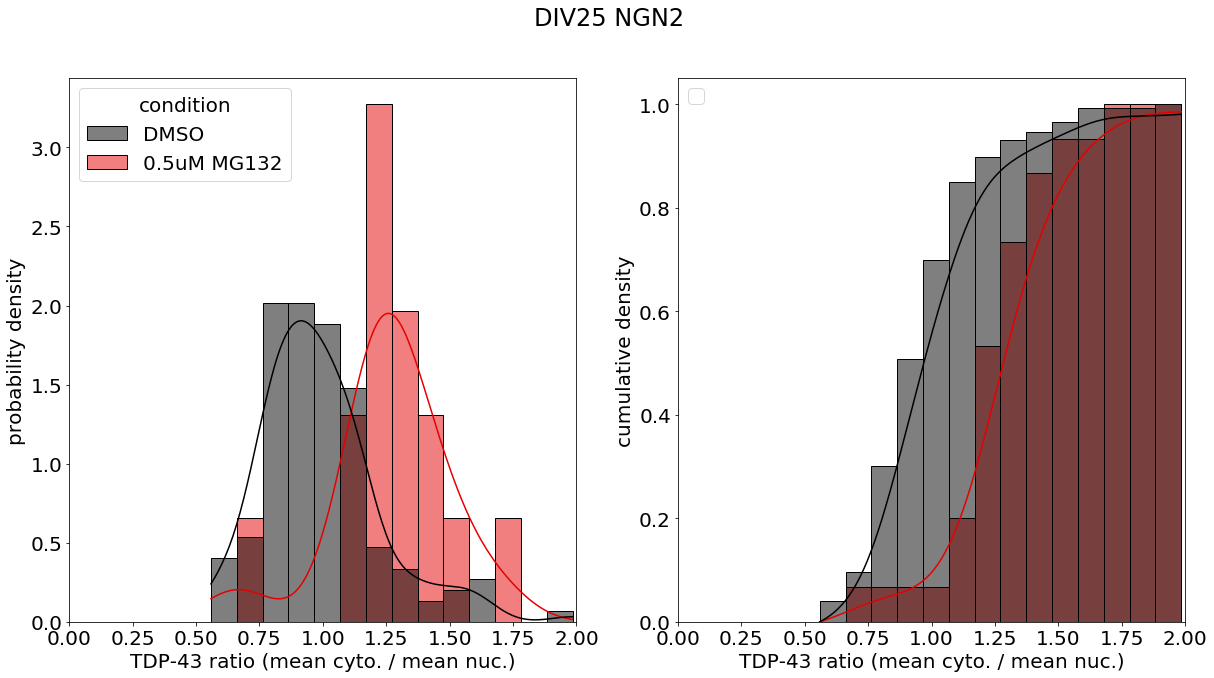

In [121]:
pal = [[0, 0, 0], [0.9, 0, 0]]
# ratio_data.loc[ratio_data['col'] == '2', 'col'] = '1'
# data['condition'] = data['concentration']
data = ratio_data.drop(ratio_data.index[ratio_data['ImageNumber'] == 1])
row = 'E'
data.loc[data['col'] == '02', 'row'] = row
data = data.query('col==["02","06"]')
data = data.query('row==@row')
data['condition'] = data['row'] + data['col'] 
data.loc[data['condition']== row + '02', 'condition'] = 'DMSO'
data.loc[data['condition']== row + '06', 'condition'] = '0.5uM MG132'
ngn2_data = data.copy()
fig, axs = plt.subplots(1,2)
# sns.histplot(ax=axs[0], data=data, x='TDP43_corrected', hue='col', kde=True, common_bins=True, stat='density', common_norm=False)
axs[0].set_xlabel('TDP-43 ratio (mean cyto. / mean nuc.)')
axs[0].set_ylabel('probability density')
sns.histplot(ax=axs[0], data=data, x='TDP43_ratio', hue='condition', stat='density', kde=True, common_bins=True, common_norm=False, palette=pal, multiple="layer")
axs[0].set_xlim([0, 2])
sns.histplot(ax=axs[1], data=data, x='TDP43_ratio', hue='condition', stat='density', kde=True, common_bins=True, common_norm=False, cumulative=True, palette=pal, multiple="layer")
axs[1].set_xlabel('TDP-43 ratio (mean cyto. / mean nuc.)')
axs[1].set_ylabel('cumulative density')
plt.legend([])
plt.xlim([0, 2])
plt.suptitle('DIV25 NGN2')

### Load data from MN DIV35 experiment & process

In [122]:
def get_ion(nucleus, soma, img_height = 1024, img_width = 1024):
    """
    Get intersection over nucleus. Similar to IoU, but divide by nucleus area
    instead of union, because we want a metric for nucleus containment within
    cytoplasm.
    """

    nucleus_img = np.zeros([img_height, img_width], dtype=bool)
    soma_img = np.zeros([img_height, img_width], dtype=bool)

    nucleus_img[nucleus[0]:nucleus[2], nucleus[1]:nucleus[3]] = True
    soma_img[soma[0]:soma[2], soma[1]:soma[3]] = True
    
    ion = (nucleus_img * soma_img).sum() / (nucleus_img).sum()
    return ion

def get_bounding_box(row):
    bb = [
        row['AreaShape_BoundingBoxMinimum_X'],
        row['AreaShape_BoundingBoxMinimum_Y'],
        row['AreaShape_BoundingBoxMaximum_X'],
        row['AreaShape_BoundingBoxMaximum_Y']
    ]
    return bb

In [123]:
data_dir = Path('/lab/processed-data/EXP_JSM004_MN_DIV35')
image_data = pd.read_csv(data_dir / 
                         '2023-02-01_jessie_tdp-43_MN_hand_drawn'/
                         '2023-01-09_tdp43_analysisImage.csv')
soma_data = pd.read_csv(data_dir / 
                        '2023-02-01_jessie_tdp-43_MN_hand_drawn'/
                        '2023-01-09_tdp43_analysiscytoplasm_outlines.csv')
nuclei_data = pd.read_csv(data_dir / 
                          '2023-02-01_jessie_tdp-43_MN_hand_drawn'/
                          '2023-01-09_tdp43_analysisnuclei.csv')


In [124]:
soma_reindex = []
for img_number in nuclei_data['ImageNumber'].unique():

    nd = nuclei_data.query('ImageNumber==@img_number')
    sd = soma_data.query('ImageNumber==@img_number')

    for i_nucleus, nd_row in nd.iterrows():
        nucleus_bb = get_bounding_box(nd_row)

        ion_list = []
        for i_soma, sd_row in sd.iterrows():
            soma_bb = get_bounding_box(sd_row)

            ion_list.append(get_ion(soma_bb, nucleus_bb))

        best_soma = np.array(ion_list).argmax()
        soma_reindex.append(sd.index[best_soma])

soma_data = soma_data.reindex(soma_reindex)
soma_data.index = np.arange(soma_data.shape[0])

In [125]:
measurement = 'Intensity_IntegratedIntensity_'
channels = ['TDP43_corrected', 'pTDP43_corrected']

ratio_data = pd.DataFrame(index = soma_data.index, 
                          columns = channels)
n_cells = soma_data.shape[0]
ratio_data['row'] = np.zeros(n_cells)
ratio_data['col'] = np.zeros(n_cells)
ratio_data['concentration'] = np.zeros(n_cells)
ratio_data['ImageNumber'] = soma_data['ImageNumber']

# Create ratio data
# for ch in channels:
    # ratio_data[ch] = ((soma_data[measurement + ch] - 
    #                    nuclei_data[measurement + ch]) / 
    #                   nuclei_data[measurement + ch])
    # ratio_data[ch].loc[ratio_data['ImageNumber'] == 1] = 1

# Add raw data columns to dataframe
ratio_data['TDP43_nucleus'] = nuclei_data[measurement + channels[0]] / nuclei_data['AreaShape_Area']
ratio_data['TDP43_cytoplasm'] = (soma_data[measurement + channels[0]] - 
                                 nuclei_data[measurement + channels[0]]) /  (soma_data['AreaShape_Area'] - nuclei_data['AreaShape_Area'])
ratio_data['pTDP43_nucleus'] = nuclei_data[measurement + 'p' + channels[0]]
ratio_data['pTDP43_cytoplasm'] = (soma_data[measurement + 'p' + channels[0]] - 
                                  nuclei_data[measurement + 'p' + channels[0]])
ratio_data['TDP43_ratio'] = (ratio_data['TDP43_cytoplasm'] / 
                             ratio_data['TDP43_nucleus'])
# Create lookup table for rows-concentrations
conc_lookup = {'A' : 'DMSO',
               'B' : '0.5uM MG132',
               'C' : '0.5 MG132 + 8948',
               'D' : 'Cmpd. 8948'}

# Assign each cell a row & column index, and concentration (condition)
for i_cell in np.arange(n_cells):
    ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][7]
    ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][8]
    ratio_data['concentration'].iloc[i_cell] = conc_lookup[ratio_data['row'].iloc[i_cell]]

# # Create lookup table for rows-concentrations
# conc_lookup = {'B' : 4e-6,
#                'C' : 2e-6,
#                'D' : 1e-6,
#                'E' : 500e-9,
#                'F' : 250e-9,
#                'G' : 125e-9}

# # Assign each cell a row & column index, and concentration (condition)
# for i_cell in np.arange(n_cells):
#     # ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][28]
#     # ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][29:31]
#     ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][25]
#     ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][26:28]
#     ratio_data['concentration'].iloc[i_cell] = conc_lookup[ratio_data['row'].iloc[i_cell]]

# # Remove first image, which is unlabeled
# ratio_data = ratio_data.drop(index=1)
# n_cells = ratio_data.shape[0]
# ratio_data.index = np.arange(n_cells)

n_cells = ratio_data.shape[0]
ratio_data.index = np.arange(n_cells)

/tmp/ipykernel_4614/3896635451.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['row'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][7]
/tmp/ipykernel_4614/3896635451.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['col'].iloc[i_cell] = soma_data['FileName_DAPI'].iloc[i_cell][8]
/tmp/ipykernel_4614/3896635451.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_data['concentration'].iloc[i_

Text(0.5, 0.98, 'DIV35 Motor Neurons')

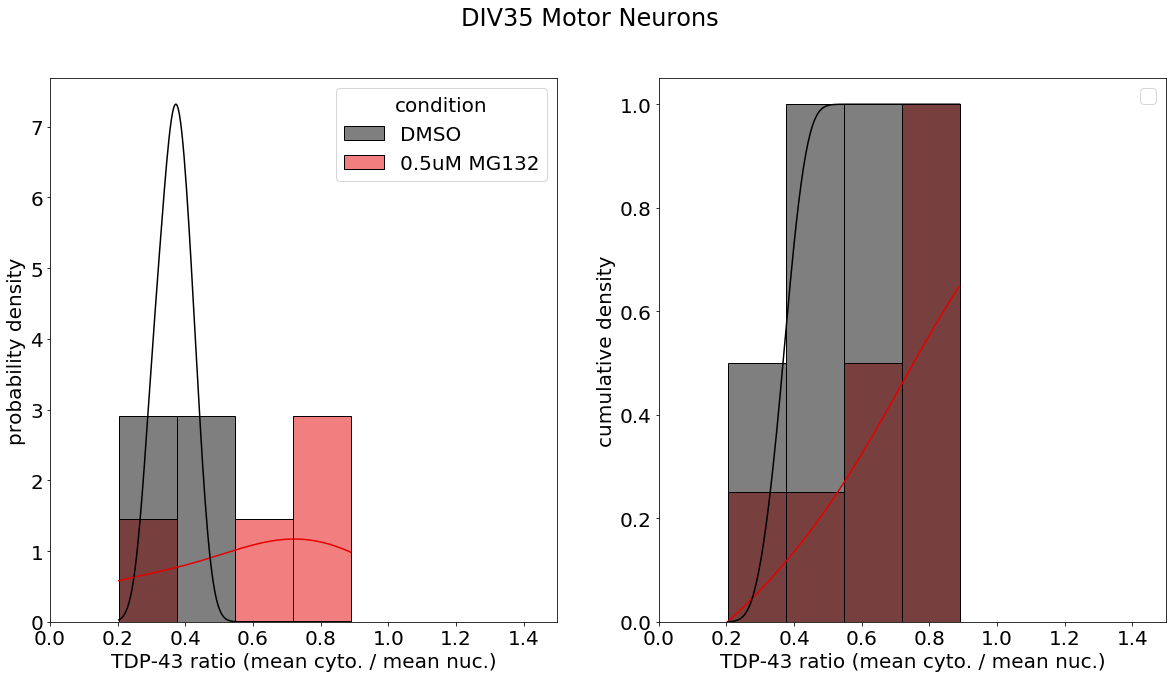

In [126]:
pal = [[0, 0, 0], [0.9, 0, 0]]
ratio_data.loc[ratio_data['col'] == '2', 'col'] = '1'
data = ratio_data.query('col=="1"')
# data = ratio_data.query('col==["02","06"]')
data = data.query('row==["A","B"]')
# data = data.query('row==["B","F"]')
data['condition'] = data['concentration']
# data['well'] = data['row'] + data['col'] 
fig, axs = plt.subplots(1,2)
# sns.histplot(ax=axs[0], data=data, x='TDP43_corrected', hue='col', kde=True, common_bins=True, stat='density', common_norm=False)
axs[0].set_xlabel('TDP-43 ratio (mean cyto. / mean nuc.)')
axs[0].set_ylabel('probability density')
sns.histplot(ax=axs[0], data=data, x='TDP43_ratio', hue='condition', stat='density', kde=True, common_bins=True, common_norm=False, palette=pal, multiple="layer")
axs[0].set_xlim([0, 1.5])
sns.histplot(ax=axs[1], data=data, x='TDP43_ratio', hue='condition', stat='density', kde=True, common_bins=True, common_norm=False, cumulative=True, palette=pal, multiple="layer")
axs[1].set_xlabel('TDP-43 ratio (mean cyto. / mean nuc.)')
axs[1].set_ylabel('cumulative density')
plt.legend([])
plt.xlim([0, 1.5])
plt.suptitle('DIV35 Motor Neurons')

/tmp/ipykernel_4614/538155839.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(ax=axs[0], data=ngn2_data, y='TDP43_ratio', x='condition', palette=pal, size=10, linewidth=2)
/tmp/ipykernel_4614/538155839.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(ax=axs[1], data=data, y='TDP43_ratio', x='condition', palette=pal, size=10, linewidth=2)


Text(745.8522727272725, 0.5, 'TDP-43 ratio (cytoplasm / nucleus)')

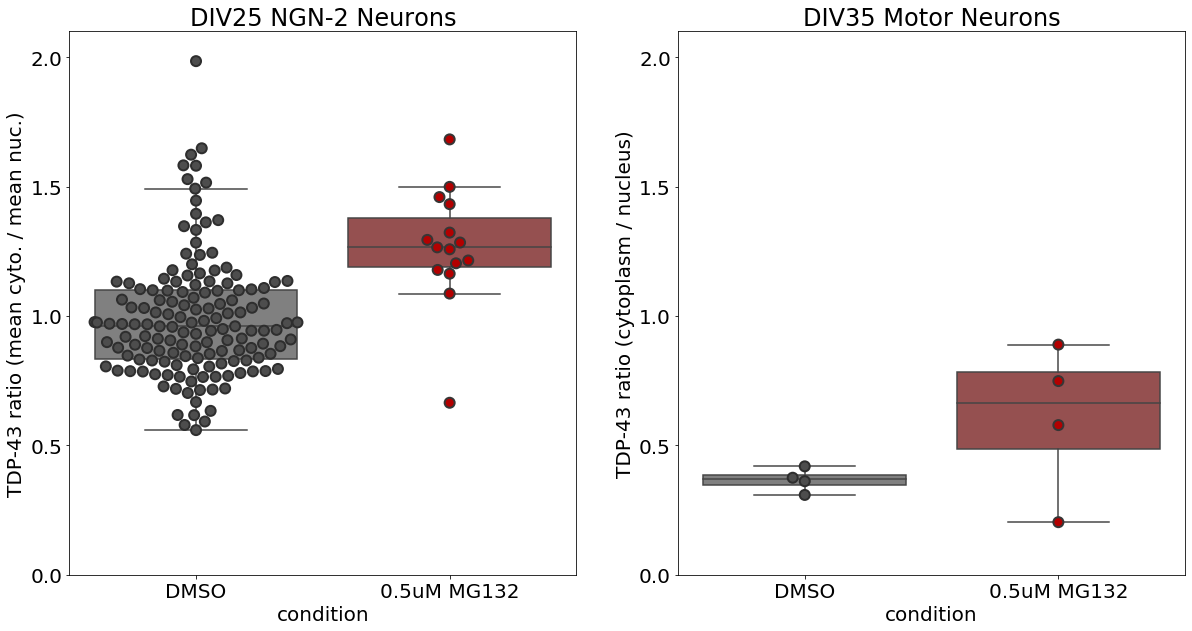

In [142]:
ratio_data.loc[ratio_data['col'] == '2', 'col'] = '1'
data = ratio_data.query('col=="1"')
# data = ratio_data.query('col==["02","06"]')
data = data.query('row==["A","B"]')
# data = data.query('row==["B","F"]')
data['condition'] = data['concentration']
# data['well'] = data['row'] + data['col'] 
fig, axs = plt.subplots(1,2)
# sns.histplot(ax=axs[0], data=data, x='TDP43_corrected', hue='col', kde=True, common_bins=True, stat='density', common_norm=False)

pal = [[0.5, 0.5, 0.5], [0.9, 0, 0]]
# sns.violinplot(ax=axs[0], data=ngn2_data, y='TDP43_ratio', x='condition', palette=pal, saturation=0.3)
sns.boxplot(ax=axs[0], data=ngn2_data, y='TDP43_ratio', x='condition', palette=pal, saturation=0.3, showfliers=False)
pal = [[0.3, 0.3, 0.3], [0.7, 0, 0]]
sns.swarmplot(ax=axs[0], data=ngn2_data, y='TDP43_ratio', x='condition', palette=pal, size=10, linewidth=2) 

pal = [[0.5, 0.5, 0.5], [0.9, 0, 0]]
# sns.violinplot(ax=axs[1], data=data, y='TDP43_ratio', x='condition', palette=pal, saturation=0.3)
sns.boxplot(ax=axs[1], data=data, y='TDP43_ratio', x='condition', palette=pal, saturation=0.3, showfliers=False)
pal = [[0.3, 0.3, 0.3], [0.7, 0, 0]]
sns.swarmplot(ax=axs[1], data=data, y='TDP43_ratio', x='condition', palette=pal, size=10, linewidth=2) 

axs[0].set_yticks([0, 0.5, 1, 1.5, 2])
axs[1].set_yticks([0, 0.5, 1, 1.5, 2])
axs[0].set_ylim([0, 2.1])
axs[1].set_ylim([0, 2.1])
axs[0].set_title('DIV25 NGN-2 Neurons')
axs[1].set_title('DIV35 Induced Motor Neurons')
axs[0].set_ylabel('TDP-43 ratio (mean cyto. / mean nuc.)')
axs[1].set_ylabel('TDP-43 ratio (cytoplasm / nucleus)')